# <center><u>Credit Card Fraud Detection</u></center>


### Introduction
Technology usage in our daily lives has grown exponentially since the advent of modernization. Trading of goods and services have become faster and easier in the markets since the emergence of credit cards. Credit cards usage has become quite ubiquitous and convenient. 

There are however downsides to credit card usage in e-commerce. The most egregious of these disadvantages are Identity theft and fraudulent transactions. 

Despite the deployment of stringent and sophisticated security systems against such activities, some individuals very often discover ways to circumvent them.

This has called for the need to turn to machine learning to find a cost-effective and productive solution to this never-ending challenge.

### Problem Statement 
In fiscal year 2018 alone, a total amount of $24.26 billion was lost due to payment card fraud worldwide. Credit card fraud is on the ascendency and hence the need to curb it.

Financial institutions such as ours Jubrieleo Fintech and merchants take responsibility for most of the money lost to fraudulent activities. These kind of activities have caused a lot of inconvenience to unwitting customers and eventually engendered loss of credibilty on the side of various businesses. 

For these reasons, businesses need to be vigilant in detecting these anomalies(fraudulent credit card transactions) using data science techniques so that the customers are not charged for items that they did not purchase.

### Objective 

To explore features of the dataset transformed through PCA for security reasons. 

We then go ahead to build fraud detection classifier models to detect and distinguish fraudulent activities using a highly unbalanced dataset. 

Oversampling was adopted to solve the issue of imbalance classes, to avoid lopsided predictions.

In [1]:
# Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
#Read File
## Using pandas we load the dataset from the csv file
data = pd.read_csv('creditcard.csv').sample(frac = 0.03, random_state=99)


### Data Description


In [3]:
#Viewing number of rows and columns
data.shape

(8544, 31)

We have a total of 8544 rows and 31 columns of data

In [4]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261159,159889.0,2.048491,-0.120830,-1.209818,0.209792,0.089693,-0.670280,0.060531,-0.152909,0.334742,...,-0.265739,-0.672070,0.282420,-0.411313,-0.281930,0.203335,-0.076016,-0.074597,0.89,0
235724,148515.0,-2.006524,-3.078282,-3.254367,-0.526732,1.812961,-1.045563,1.184258,-0.023694,-2.296439,...,0.655365,0.821678,0.943854,-0.213596,-1.120756,0.705401,0.046045,-0.100132,437.18,0
135350,81211.0,-1.827670,0.686886,1.678687,-1.685654,-1.566990,-0.779896,-0.812478,-0.525190,-0.636217,...,1.266705,0.989912,-0.254594,0.729720,-0.057190,-0.318278,-0.923682,-0.521281,24.99,0
117695,74773.0,-1.604361,0.511687,0.974334,-1.066100,-1.137993,-1.371626,-0.369477,0.573481,-1.924887,...,0.373517,0.642134,-0.386537,0.763003,0.502120,-0.112818,-0.248276,-0.201630,50.85,0
272704,165226.0,-0.512699,1.764799,-2.469290,-0.245378,2.254845,-2.054004,1.527645,-0.394940,-0.613274,...,0.013658,0.223209,-0.484233,-0.660957,-0.250178,0.189870,0.224704,0.309463,7.59,0
134748,80943.0,-9.593881,-9.908475,0.453375,1.603979,1.649744,-1.676584,1.596386,-1.311549,1.390451,...,-1.950620,1.833336,5.929093,0.283421,1.747382,1.426062,2.621468,-1.629172,704.82,0
81578,58999.0,1.333001,-0.486340,0.581703,-0.839925,-0.842187,-0.251369,-0.713423,0.072957,-1.086004,...,-0.016281,-0.140147,0.153543,-0.000376,0.139974,-0.469028,0.026131,0.008604,2.56,0
186697,127218.0,1.857451,0.071823,-0.086963,3.553877,0.082026,1.245277,-0.788886,0.467363,-0.271086,...,0.170106,0.451313,0.157898,0.129330,-0.228721,0.012281,-0.003598,-0.041590,11.31,0
186888,127295.0,2.117354,-0.638405,-1.044721,-0.538743,-0.838481,-1.026182,-0.844437,-0.185670,-0.026822,...,0.255837,0.855282,0.098300,-0.094838,-0.147627,-0.087464,0.034881,-0.009462,24.99,0
254552,156783.0,0.081213,0.970336,-0.338066,-0.634255,0.929073,-0.495618,0.867618,0.055304,-0.312496,...,-0.274868,-0.679723,0.111978,0.599800,-0.482473,0.092367,0.220619,0.074994,5.99,0


In [5]:
# Information finding
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8544 entries, 252556 to 125126
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8544 non-null   float64
 1   V1      8544 non-null   float64
 2   V2      8544 non-null   float64
 3   V3      8544 non-null   float64
 4   V4      8544 non-null   float64
 5   V5      8544 non-null   float64
 6   V6      8544 non-null   float64
 7   V7      8544 non-null   float64
 8   V8      8544 non-null   float64
 9   V9      8544 non-null   float64
 10  V10     8544 non-null   float64
 11  V11     8544 non-null   float64
 12  V12     8544 non-null   float64
 13  V13     8544 non-null   float64
 14  V14     8544 non-null   float64
 15  V15     8544 non-null   float64
 16  V16     8544 non-null   float64
 17  V17     8544 non-null   float64
 18  V18     8544 non-null   float64
 19  V19     8544 non-null   float64
 20  V20     8544 non-null   float64
 21  V21     8544 non-null   float6

We have in the printed columns 'Time' through to 'Amount' and then 'Class'. We realize that in between we have columns labeled 'V1' to 'V28'. These are the result of a PCA dimensionality reduction that was used in order to protect sensitive information in this dataset for example the identity and locations of individuals who made transactions. 

All the columns had float data types except that of class which had integers. 

Each column has a total of 284807 entries hence we can tell that there are no missing values.

In [6]:
# Descriptive Statistics
pd.set_option('display.max_columns', None) # To see all columns
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000
mean,94803.065660,-0.013545,0.007454,-0.002807,0.029986,-0.002224,0.004832,0.025513,0.010962,-0.006814,0.001850,0.003198,0.004148,0.005701,0.007060,-0.002475,0.002197,-0.003882,-0.009696,-0.000011,-0.008644,0.003785,0.004233,0.009630,0.003193,-0.001721,0.001824,-0.005223,-0.002101,90.747739,0.001756
std,47913.922916,1.970764,1.744998,1.518052,1.430631,1.425865,1.349990,1.259751,1.077420,1.106838,1.058021,1.021036,0.971168,1.004356,0.947020,0.914075,0.874554,0.855203,0.838204,0.820867,0.832856,0.668341,0.713711,0.561599,0.605121,0.512570,0.484586,0.407450,0.315962,286.698594,0.041866
min,10.000000,-32.543140,-50.383269,-21.919174,-4.629003,-23.611865,-21.929312,-24.377116,-23.632502,-8.739670,-18.271168,-3.587139,-12.893520,-3.737132,-12.875494,-4.152532,-10.402068,-18.485460,-8.314092,-3.768016,-17.867869,-11.273890,-6.320710,-11.310338,-2.473753,-4.547278,-1.577118,-6.978859,-8.412267,0.000000,0.000000
25%,53217.750000,-0.940792,-0.569531,-0.895115,-0.825888,-0.676228,-0.756202,-0.534972,-0.208313,-0.670805,-0.526988,-0.769144,-0.402404,-0.644111,-0.423442,-0.577975,-0.470150,-0.486597,-0.487313,-0.456984,-0.212155,-0.223620,-0.532904,-0.155569,-0.357536,-0.312203,-0.329688,-0.071995,-0.054391,5.980000,0.000000
50%,84699.500000,0.012032,0.085959,0.189696,-0.002372,-0.041816,-0.279252,0.045675,0.024417,-0.065341,-0.090282,-0.028310,0.142810,-0.014391,0.054325,0.042557,0.069615,-0.069362,-0.007646,0.018531,-0.066333,-0.025195,0.016314,-0.008086,0.045639,0.010950,-0.050568,0.001777,0.010670,21.500000,0.000000
75%,139673.750000,1.317696,0.809167,1.032170,0.781248,0.619448,0.408059,0.575040,0.336447,0.595219,0.471033,0.756313,0.616740,0.674774,0.506623,0.647173,0.523409,0.393882,0.474557,0.461662,0.123652,0.188327,0.517614,0.148640,0.441296,0.347983,0.240289,0.093495,0.078797,75.285000,0.000000
max,172769.000000,2.401777,12.352519,3.862590,11.122771,32.911462,16.493227,21.437514,12.857165,8.433788,12.076882,7.190306,3.709133,3.685570,5.385183,3.690253,5.018005,9.253526,4.295648,4.296526,26.237391,14.726148,3.661957,22.528412,4.014444,4.301757,2.736195,6.211230,9.876371,12910.930000,1.000000


### Missing values

In [7]:
# Check missing values
drop_missing = data.dropna() # drop the rows that have at least one element missing
drop_missing.shape # Verify the dimension of the data and it is the same as the original dimension

(8544, 31)

We can confirm there are no missing values since the shape of the data remains the same

In [8]:
#Sum of missing cells for each attribute
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Checking number of fraudulent and genuine
data['Class'].value_counts().to_frame()

,Class
0,8529
1,15


This shows a complete imbalance of classes.

In [10]:
#checking the percentage of each class in the dataset
data['Class'].value_counts(normalize=True).to_frame()

,Class
0,0.998244
1,0.001756


Only 0.17% transactions are fraudulent.

#### Proportion of Transactions 

Now we try to find out the relative proportion of genuine and fraudulent credit card transactions.

Fraudulent Cases: 15
Genuine Transactions: 8529
Proportion of Fraudulent Cases: 0.0017556179775280898


<AxesSubplot:ylabel=' '>

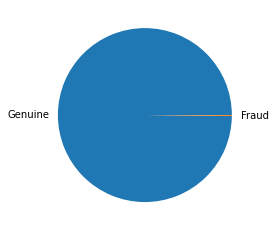

In [11]:
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Genuine Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

data_pi = data.copy()
data_pi[" "] = np.where(data_pi["Class"] == 1 ,  "Fraud", "Genuine")

%matplotlib inline
data_pi[" "].value_counts().plot(kind="pie")

Clearly there is an imbalance in the data with only 0.17% of the total cases being fraudulent. For a quick curiosity let us check if there is any difference between the amount of valid transaction and fraudulent transactions

<AxesSubplot:>

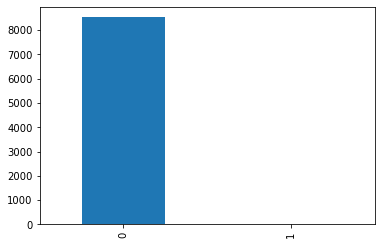

In [12]:
#visual representation of instances per class
data.Class.value_counts().plot.bar()

This gives a visual representation of the class imbalance.

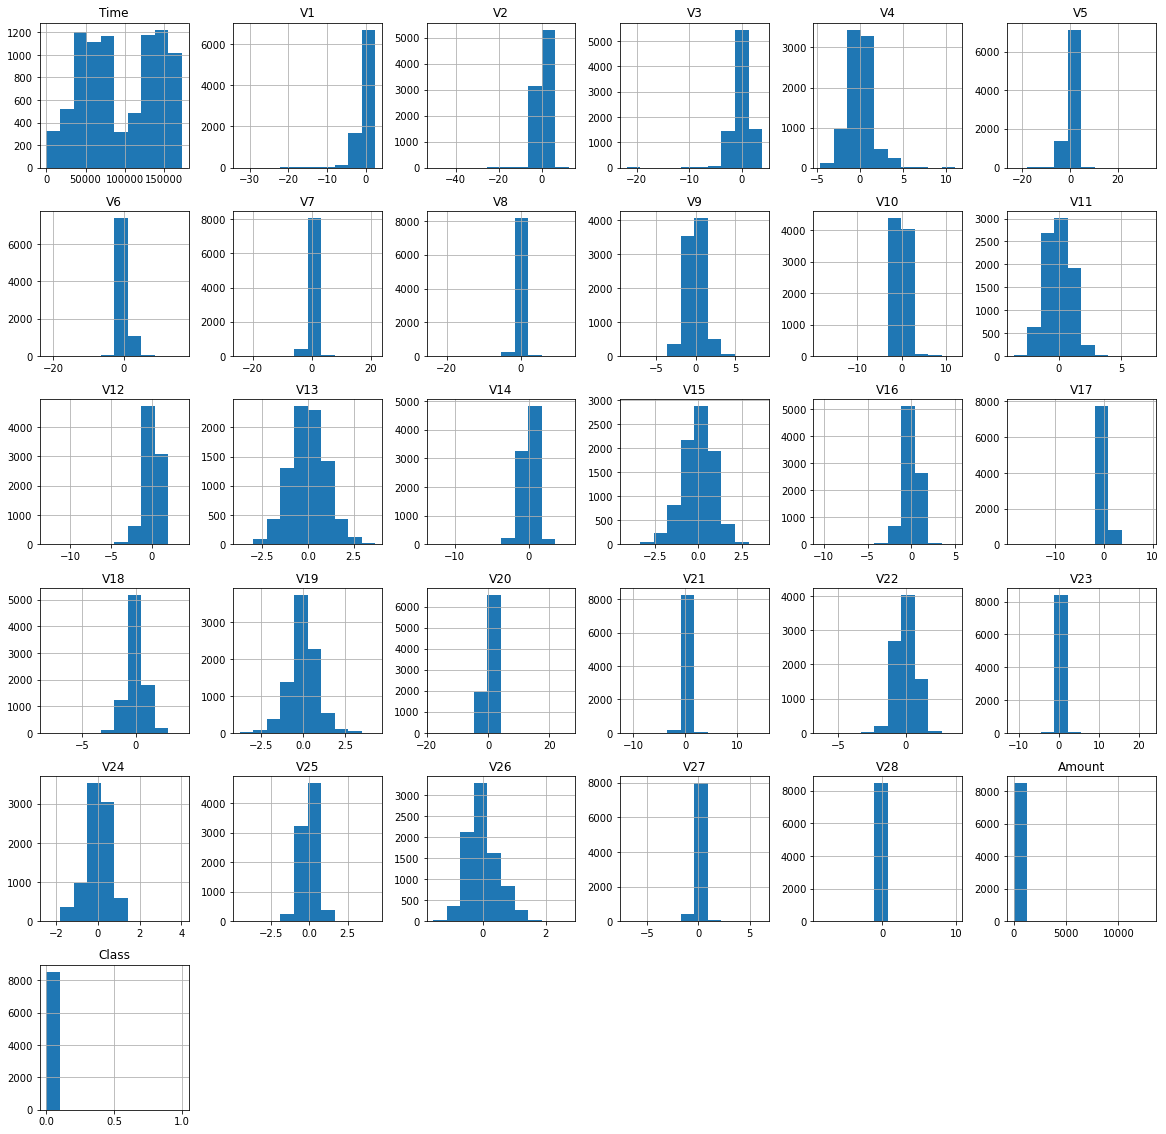

In [13]:
# Plot histograms of each parameter 
data.hist(figsize = (20,20))
plt.show()

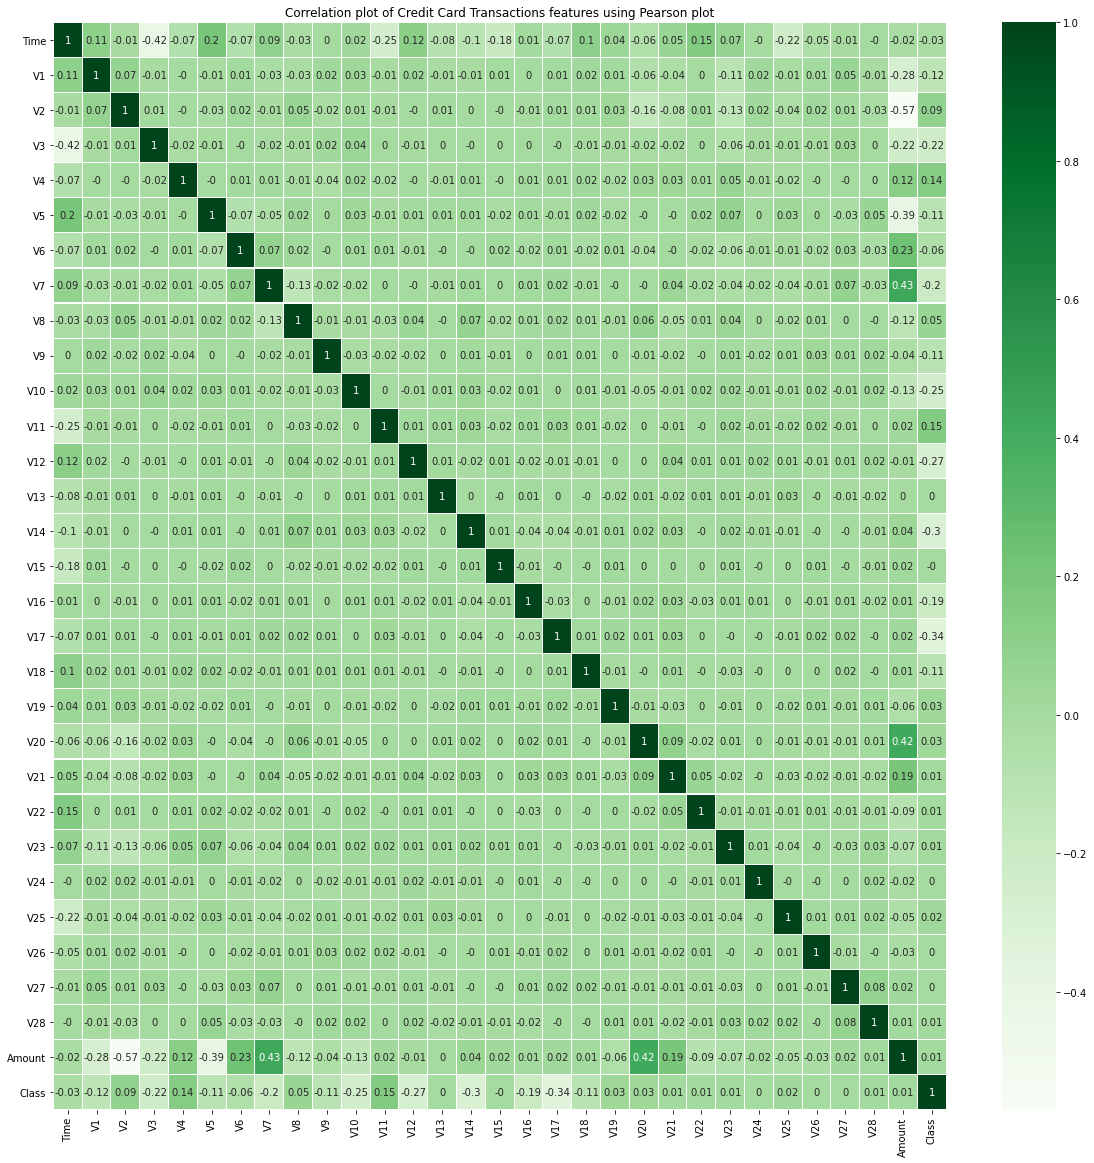

In [14]:
#Plotting correlation of Features
plt.figure(figsize = (20,20))
plt.title('Correlation plot of Credit Card Transactions features using Pearson plot')
corr = round(data.corr(), 2)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot=True)
plt.show()

There is no notable correlation between features V1-V28. 

Time has an inverse correlation with V3 and Amount has a direct correlation with V7 and V20 and, inverse correlation with V1 and V5.

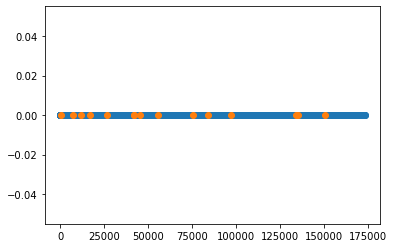

In [15]:
creditCard_genuine = data.loc[data["Class"] == 0]
creditCard_fraud = data.loc[data["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

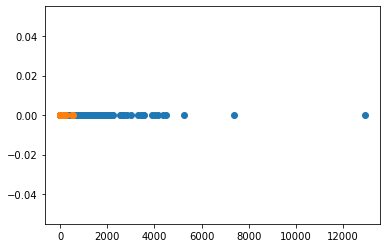

In [16]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 1000.

### Distribution of Time and Amount

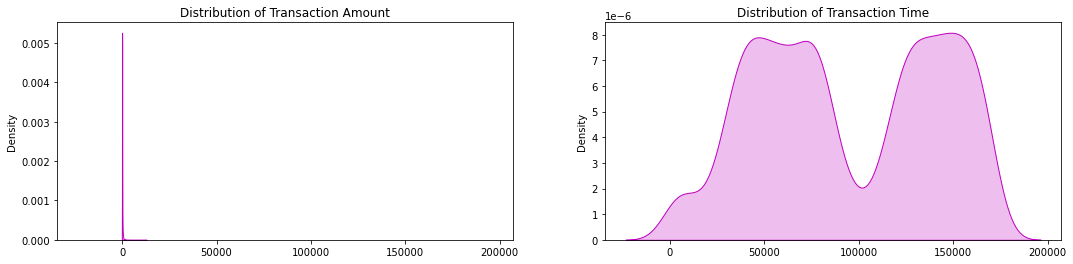

In [17]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Transaction Amount')
sns.distplot(time_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Transaction Time')

plt.show()

In [18]:
print("Average Amount in a Fraudulent Transaction: " + str(data[data["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Genuine Transaction: " + str(data[data["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 125.41866666666667
Average Amount in a Genuine Transaction: 90.68676280923857


We notice that the average Money transaction for the fraudulent cases are more.

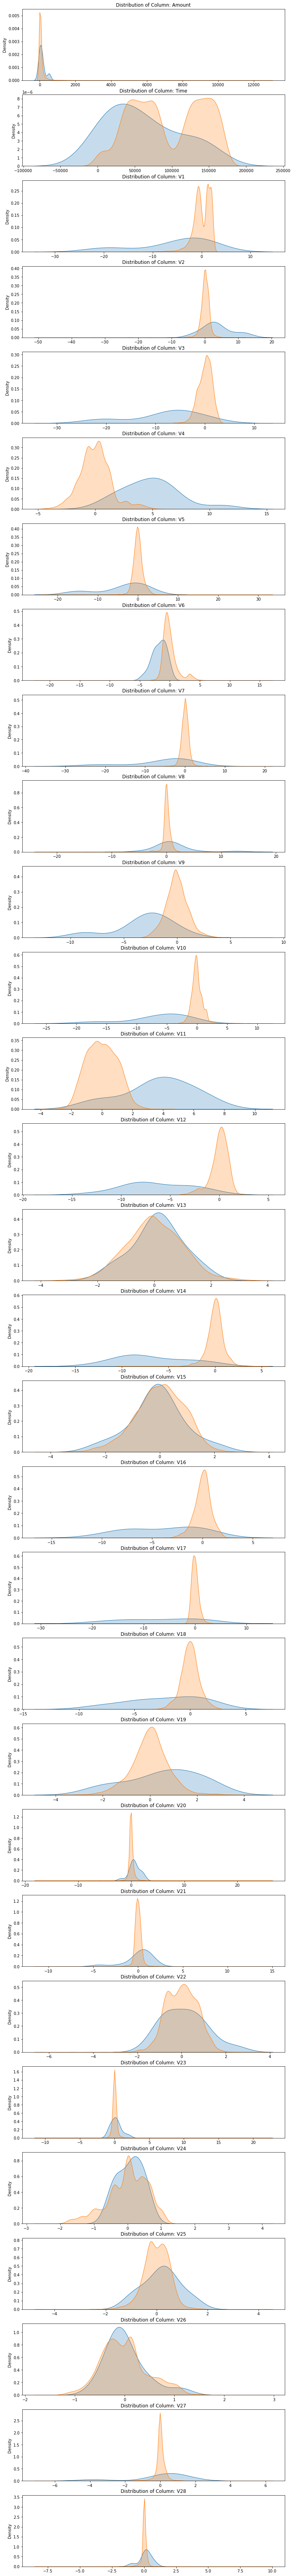

In [19]:
# Reorder the columns Amount, Time then the rest
data_plot = data.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show('all')


# <center><u> ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||</u></center>

### Data Preparation

We move on to standardization now that there are no missing data. RobustScaler is used to standardize only Time and Amount.

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(data[["Time", "Amount"]])
data[["Time", "Amount"]] = scaler.transform(data[["Time", "Amount"]])

data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
252556,0.823130,0.162017,0.135610,0.363988,0.311418,-0.203775,0.090984,1.634645,-0.716743,0.258082,0.176258,-0.441240,-0.027603,0.430925,-0.487474,0.476628,-0.696136,-0.235046,-0.023419,0.377037,0.154154,0.372756,1.631593,-0.031151,1.198226,-0.632712,0.543419,-0.257611,-0.369197,2.726355,0
37912,-0.526667,-1.193468,1.584028,1.723818,1.029230,-0.280024,-0.252214,0.452725,0.081117,-0.079666,0.772582,0.206429,0.030496,-0.161100,0.050747,1.716599,-0.585527,0.266815,-0.680506,0.239129,0.367036,-0.273335,-0.629757,0.036591,0.328362,0.168372,-0.480142,0.216149,0.216120,-0.173148,0
241557,0.767749,-0.734525,-0.761828,0.775699,-0.350649,1.826784,-0.922684,-0.059490,0.019798,0.171110,-0.126578,0.610446,0.625143,-0.562074,0.128149,-1.103508,0.200050,-0.827122,-0.144882,0.234519,0.193329,-0.232331,-0.881765,0.601462,0.692473,-1.654421,-0.537126,0.018065,0.068037,-0.267080,0
268242,0.907115,1.441170,-1.093227,-0.915038,1.209680,-0.315901,0.448336,-0.209818,0.063250,0.660443,0.259612,-0.112332,0.691030,0.412268,0.171728,0.168749,0.983453,-1.410769,1.211724,-0.180049,0.378927,0.382337,0.594818,-0.251346,-1.033954,-0.081789,-0.548596,-0.000564,-0.000709,3.858307,0
170271,0.409486,2.009151,0.228809,-2.361088,0.717779,0.603255,-0.881502,0.112419,-0.136766,0.551266,-0.879689,0.911125,0.223798,-0.631502,-2.394581,-1.018351,0.688436,1.636678,1.317608,0.197089,-0.140580,0.000343,0.277051,-0.114906,-0.640712,0.224481,0.737340,-0.044130,-0.027152,-0.132602,0
24352,-0.595777,1.122616,-0.296265,0.876789,0.072646,-1.079863,-0.674153,-0.469667,0.078004,0.305138,0.010081,1.478392,0.469573,-0.877197,0.445065,0.733417,0.775901,-0.571622,0.223341,0.111736,-0.031891,-0.061471,-0.356801,0.123205,0.563380,-0.086307,0.800839,-0.074987,0.012728,0.339081,0
38599,-0.523301,0.937244,-0.523094,1.006963,1.593791,-0.678416,1.101807,-0.656950,0.517573,1.222922,-0.234784,0.055160,0.805884,-1.710387,-0.267313,-2.215602,-0.779147,0.487714,-0.563251,0.577316,-0.150419,-0.363683,-0.817655,-0.006836,-0.336580,0.368135,-0.508746,0.065825,0.023152,0.752182,0
251867,0.819324,1.930822,-0.364144,-0.935007,0.070524,-0.270621,-0.707299,-0.113112,-0.067131,0.419687,0.255175,0.765900,0.495734,-0.722366,0.685828,0.267194,0.762928,-0.890110,-0.101550,0.418744,-0.128626,-0.407147,-1.373801,0.467272,-0.407084,-0.755704,0.018341,-0.086663,-0.054484,0.471539,0
117937,-0.113601,1.417450,-1.155520,0.613772,-1.337452,-1.565766,-0.401385,-1.171891,-0.060466,-1.696254,1.375919,-0.284705,-0.748312,0.676435,-0.438250,0.943797,-0.571710,0.706473,-0.215291,-0.764939,-0.297322,-0.000495,0.413309,-0.032702,0.079379,0.353685,-0.032694,0.056658,0.024337,0.222206,0
125126,-0.082765,0.990930,-0.675273,-0.250070,-1.541337,-0.354370,-0.339366,0.026372,0.060960,0.883098,-0.976575,2.027206,1.225931,-0.604227,0.821863,1.499129,-0.955933,0.250160,-0.663477,0.346841,0.058789,0.042338,-0.023938,-0.067531,-0.261648,0.302818,-0.078554,-0.007011,0.012297,1.392396,0


# <center><u> ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||</u></center>

### Modelling

In [21]:
# Separate response and features
X = data.drop('Class', axis = 1).values
y = data['Class'].values  # Response variable determining if fraudulent or not

print(X.shape, y.shape)
print()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=0)

print(X_train.shape)
print()
print(X_test.shape)

(8544, 30) (8544,)

(6408, 30)

(2136, 30)


### y_train before over smapling

<AxesSubplot:ylabel='count'>

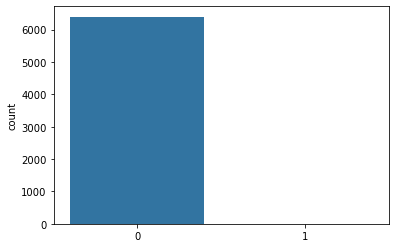

In [22]:
# y_train before over smapling
sns.countplot(x=y_train)

Due to high imbalance in the dataset fitting a model will result in overfitting towards genuine cases (the majority) 

###  Model Before Oversampling 

In [23]:
# Import evaluations
from sklearn.metrics import plot_confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,accuracy_score,precision_score,recall_score

### <center>Naive Model : Naive Bayes classifier

In [28]:
from termcolor import colored as cl # text customization
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

#Model building using  Naive Bayes classifier
model_BNB = BernoulliNB()
model_BNB.fit( X_train,y_train)

#param_grid_BNB = { 'alpha': [0.01, 0.1, 0.5, 1.0, 10.0], 'var_smoothing': np.logspace(0,-9, num=100)}

#model_BNB_grid = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid_BNB, verbose=1, cv=kf, n_jobs=-1)

print()
model_BNB_pred = model_BNB.predict( X_test)
print()

print(cl('ACCURACY SCORE', attrs = ['bold']).center(70, ' '))
print()

print('Accuracy score of the Naive Bayes classifier model is {}'.format(accuracy_score(y_test, model_BNB_pred)))
print()



                        ACCURACY SCORE                        

Accuracy score of the Naive Bayes classifier model is 0.9976591760299626




                       CONFUSION MATRIX                       


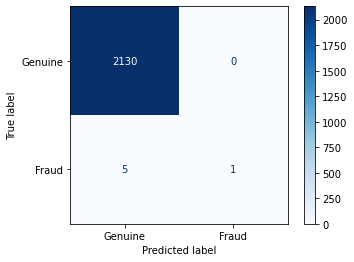

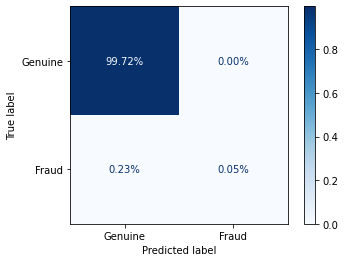



                           F1 SCORE                           

F1 score of the Naive Bayes classifier model is 0.2857142857142857


In [29]:
print()
print(cl('CONFUSION MATRIX', attrs = ['bold']).center(70, ' '))

class_names= ['Genuine', 'Fraud']
plot_confusion_matrix(model_BNB, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names) 
plt.show()

plot_confusion_matrix(model_BNB, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names,values_format='.2%', normalize= 'all')
plt.show()

print()
print()
print(cl('F1 SCORE', attrs = ['bold']).center(70, ' '))
print()
print('F1 score of the Naive Bayes classifier model is {}'.format(f1_score(y_test, model_BNB_pred)))


We had only 0.17% cases with fraud transactions and a model predicting all trasactions to be valid would have similar accuracy. So we need to train our model in a way that is not overfitted to either of the classes. for this, we introduce Oversampling technique. 
Oversampling resamples from the minority class to balance the class proportions.

## Tackling Class Imbalance Problem

<AxesSubplot:ylabel='count'>

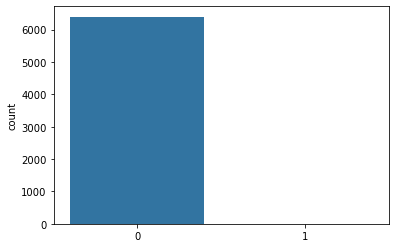

In [30]:
# y_train before over smapling
sns.countplot(x=y_train)

### Over Sampling(Applied only on Train Dataset)

length of X_train and y_train before Oversampling 6408 6408
length of X_train and y_train after Oversampling 12798 12798


<AxesSubplot:ylabel='count'>

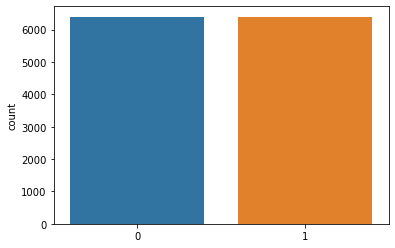

In [31]:
from imblearn.over_sampling import SMOTE

print('length of X_train and y_train before Oversampling',len(X_train),len(y_train))

OS=SMOTE(random_state=42)
X_train_OS,y_train_OS=OS.fit_resample(X_train,y_train)

print('length of X_train and y_train after Oversampling',len(X_train_OS),len(y_train_OS))

#Check for data balance
sns.countplot(x=y_train_OS)

In [32]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

### <center>Model : Logistic Regression

In [33]:
from imblearn.pipeline import Pipeline, make_pipeline

# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

#from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.simplefilter(action='ignore')

# Logistic Regression 
imba_pipeline = make_pipeline(LogisticRegression())

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}



grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                                  return_train_score=True)

grid_imba_log_reg.fit(X_train_OS, y_train_OS)

logistic_cv_score = cross_val_score(grid_imba_log_reg, X_train_OS, y_train_OS, scoring = 'recall', cv = kf)


model_LR_y_test_predict = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(X_test)
logistic_recall = recall_score(y_test, model_LR_y_test_predict)
logistic_accuracy = accuracy_score(y_test, model_LR_y_test_predict)

# print("Cross Validation Score for Logistic Regression: " + str(ulogistic_cv_score.mean()))
# print("Recall Score for Logistic Regression: " + str(ulogistic_recall))
log_reg_os = grid_imba_log_reg.best_estimator_

In [34]:
grid_imba_log_reg.best_estimator_

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=100, solver='liblinear'))])

                        ACCURACY SCORE                        

Accuracy score of the Logistic Regression model is 0.9967228464419475


                       CONFUSION MATRIX                       



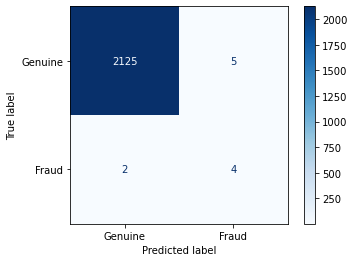

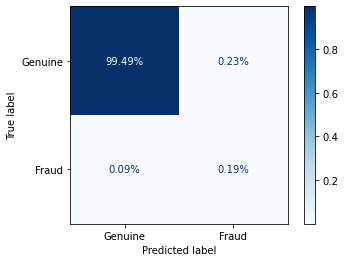

In [35]:
print(cl('ACCURACY SCORE', attrs = ['bold']).center(70, ' '))
print()
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, model_LR_y_test_predict)))
print()
print()

print(cl('CONFUSION MATRIX', attrs = ['bold']).center(70, ' '))
print()
plot_confusion_matrix(grid_imba_log_reg, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names) 
plt.show()

plot_confusion_matrix(grid_imba_log_reg, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names, values_format='.2%', normalize='all') 
plt.show()

In [36]:
print(cl('F1 SCORE', attrs = ['bold']).center(70, ' '))
print()
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, model_LR_y_test_predict)))

                           F1 SCORE                           

F1 score of the Logistic Regression model is 0.5333333333333333


### <center>Model 3 : Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

parameters = {
    "n_estimators":[10,50,100,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
grid_imba_GB = GridSearchCV(gbc,parameters,cv=kf)
grid_imba_GB.fit(X_train_OS, y_train_OS)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        


In [65]:
grid_imba_GB.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=250)

In [66]:
model_GB=grid_imba_GB.best_estimator_.fit(X_train_OS, y_train_OS)

In [67]:
model_GB_y_test_predict = grid_imba_GB.best_estimator_.predict(X_test)
GB_recall = recall_score(y_test, model_GB_y_test_predict)
GB_accuracy = accuracy_score(y_test, model_GB_y_test_predict)


                        ACCURACY SCORE                        

Accuracy score of the Gradient Boosting Classifier model is 0.9990636704119851


                       CONFUSION MATRIX                       


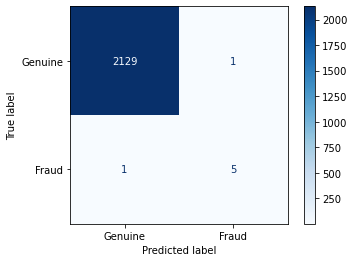

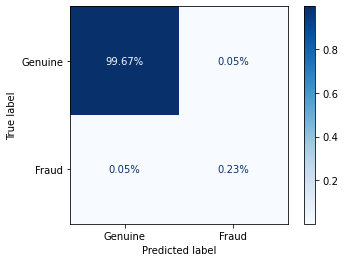

In [68]:
print()
print(cl('ACCURACY SCORE', attrs = ['bold']).center(70, ' '))
print()
print('Accuracy score of the Gradient Boosting Classifier model is {}'.format(accuracy_score(y_test, model_GB_y_test_predict)))
print()
print()

print(cl('CONFUSION MATRIX', attrs = ['bold']).center(70, ' '))

plot_confusion_matrix(model_GB, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names) 
plt.show()

plot_confusion_matrix(model_GB, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names, values_format='.2%', normalize='all') 
plt.show()

In [69]:
print(cl('F1 SCORE', attrs = ['bold']).center(70, ' '))
print()
print('F1 score of the Gradient Boosting Classifier model is {}'.format(f1_score(y_test, model_GB_y_test_predict)))

                           F1 SCORE                           

F1 score of the Gradient Boosting Classifier model is 0.8333333333333334


### <center> Model  : AdaBoost Classifiers

In [45]:
# define the model with default hyperparameters
# Import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Model building using AdaBoost Classifier
model=AdaBoostClassifier(base_estimator=dtree)
 
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kf, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_OS, y_train_OS)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.999453 using {'learning_rate': 1.0, 'n_estimators': 500}


In [46]:
best_AdaBoostClassifier = grid_result.best_estimator_
best_AdaBoostClassifier

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500)

In [47]:
model_Adaboost = best_AdaBoostClassifier.fit(X_train_OS, y_train_OS)

In [48]:
model_adaboost_y_test_predict = model_Adaboost.predict(X_test)
adaboost_recall = recall_score(y_test, model_adaboost_y_test_predict)
adaboost_accuracy = accuracy_score(y_test, model_adaboost_y_test_predict)

                        ACCURACY SCORE                        

Accuracy score of the AdaBoost classifier model is 0.9990636704119851


                       CONFUSION MATRIX                       


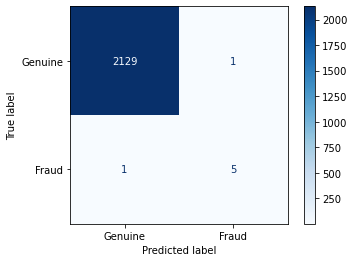

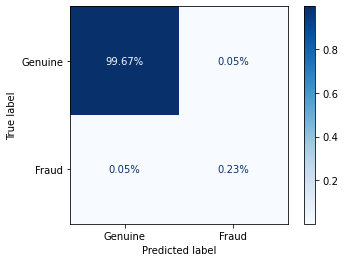

In [49]:
print(cl('ACCURACY SCORE', attrs = ['bold']).center(70, ' '))
print()
print('Accuracy score of the AdaBoost classifier model is {}'.format(accuracy_score(y_test, model_adaboost_y_test_predict)))
print()
print()
print(cl('CONFUSION MATRIX', attrs = ['bold']).center(70, ' '))

plot_confusion_matrix(model_Adaboost, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names) 
plt.show()

plot_confusion_matrix(model_Adaboost, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names, values_format='.2%', normalize='all') 
plt.show()

In [50]:
print(cl('F1 SCORE', attrs = ['bold']).center(70, ' '))
print()
print('F1 score of the Ada Boost Classifiers model is {}'.format(f1_score(y_test, model_adaboost_y_test_predict)))

                           F1 SCORE                           

F1 score of the Ada Boost Classifiers model is 0.8333333333333334


### <center>Model :  XGBoost classifier

In [51]:
from xgboost import XGBClassifier
# define the model with default hyperparameters

model = XGBClassifier(scale_pos_weight=99)
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kf, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_OS, y_train_OS)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

[14:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.999453 using {'learning_rate': 0.1, 'n_estimators': 500}


In [52]:
best_XGBClassifier = grid_result.best_estimator_
best_XGBClassifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=99, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
model_XGBClassifier = best_XGBClassifier.fit(X_train_OS, y_train_OS)
model_XGBClassifier_y_test_predict = model_XGBClassifier.predict(X_test)
XGBClassifier_recall = recall_score(y_test, model_XGBClassifier_y_test_predict)
XGBClassifier_accuracy = accuracy_score(y_test, model_XGBClassifier_y_test_predict)

[14:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



                        ACCURACY SCORE                        

Accuracy score of the XGBoost classifier model is 0.9995318352059925


                       CONFUSION MATRIX                       


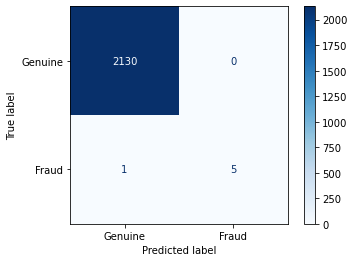

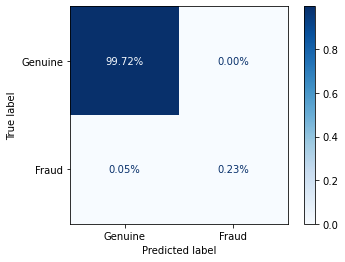

In [54]:
print()
print(cl('ACCURACY SCORE', attrs = ['bold']).center(70, ' '))
print()
print('Accuracy score of the XGBoost classifier model is {}'.format(accuracy_score(y_test, model_XGBClassifier_y_test_predict)))
print()
print()

print(cl('CONFUSION MATRIX', attrs = ['bold']).center(70, ' '))

plot_confusion_matrix(model_XGBClassifier, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names) 
plt.show()

plot_confusion_matrix(model_XGBClassifier, X_test, y_test, cmap = plt.cm.Blues, display_labels=class_names, values_format='.2%', normalize='all') 
plt.show()

In [55]:
print(cl('F1 SCORE', attrs = ['bold']).center(70, ' '))
print()
print('F1 score of the XGBoost classifier model is {}'.format(f1_score(y_test, model_XGBClassifier_y_test_predict)))

                           F1 SCORE                           

F1 score of the XGBoost classifier model is 0.9090909090909091


In [75]:
# Gather the scores
final_scores = [['Logistic Regression', accuracy_score(y_test, model_LR_y_test_predict), f1_score(y_test, model_LR_y_test_predict) ], 
        ['Gradient Boost', accuracy_score(y_test, model_GB_y_test_predict), f1_score(y_test, model_GB_y_test_predict)], 
        ['AdaBoostClassifier ', accuracy_score(y_test, model_adaboost_y_test_predict), f1_score(y_test, model_adaboost_y_test_predict)],
        ['XGBoost ', accuracy_score(y_test, model_XGBClassifier_y_test_predict), f1_score(y_test, model_XGBClassifier_y_test_predict)]
                    ] 
  
# Create the dataframe 
final_df = pd.DataFrame(final_scores, columns = ['Classifier', 'Accuracy Score', 'F1 Score']) 
final_df
final_df.style.highlight_max().set_caption("XGBoost Classifier stands out as the best performing model with the highest accuracy").set_precision(4).background_gradient()

,Classifier,Accuracy Score,F1 Score
0,Logistic Regression,0.9967,0.5333
1,Gradient Boost,0.9991,0.8333
2,AdaBoostClassifier,0.9991,0.8333
3,XGBoost,0.9995,0.9091


# Conclusion

Comparing the F1 scores, XGBoost Classifier is selected as the best model to detect credit card fraud. Despite it having the highest accuracy it was not enough to reach a conclusive decision since accuracies could be misleading. Hence the dependence on the F1 scores.

Moving forward, the automation of this model would serve as the best cost-effective and productive solution to this never-ending challenge of customers paying for unpurchased items.

# <center><u> ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||</u></center>